In [99]:
import pandas as pd

df = pd.read_pickle('df.pkl')

# Dataset basic analysis

In [58]:
print(f"Number of columns: {len(df.columns)}")
print(f"Columns: {', '.join(list(df.columns))}")
print(f"Number of rows: {len(df)}")
# print(df.head())

Number of columns: 180
Columns: value_target, class_target, well_plate_name, wp_image_version, wp_image_prop, well_name, mock, FNumber, FocalLengthIn35mmFilm, ISOSpeedRatings, Orientation, ExposureTime, FocalLength, Flash, MeteringMode, MaxApertureValue, ExposureBiasValue, BrightnessValue, ApertureValue, ShutterSpeedValue, full_gray_mean, full_gray_stddev, full_gray_mean_trm30, full_gray_skewness, full_gray_entropy, full_gray_entropy2, full_gray_entropy_glcm, full_gray_mean_PIL, full_blue_mean, full_blue_stddev, full_blue_mean_trm30, full_blue_skewness, full_blue_entropy, full_blue_entropy2, full_blue_entropy_glcm, full_blue_mean_PIL, full_green_mean, full_green_stddev, full_green_mean_trm30, full_green_skewness, full_green_entropy, full_green_entropy2, full_green_entropy_glcm, full_green_mean_PIL, full_red_mean, full_red_stddev, full_red_mean_trm30, full_red_skewness, full_red_entropy, full_red_entropy2, full_red_entropy_glcm, full_red_mean_PIL, full_L_mean, full_L_stddev, full_L_mean

# Theory

CFU stands for Colony Forming Units, which is a measure used in microbiology to estimate the number of viable bacteria or fungal cells in a sample. It's not a direct measurement of the total quantity of bacteria, but rather a measure of the number of cells capable of dividing and forming colonies.

In simple words, it is the number of "units of bacteria" capable of forming colonies.

# Features Analysis

In [100]:
# Print first record iterating on columns
print("First record:")
for col in df.columns:
    print(f"\t{col}: {df[col][0]}")

# Print the unique values of the column "mock" and "Orientation"
check_unique_columns = ["mock", "Orientation", "wp_image_prop", "ExposureTime", "FocalLength", "MaxApertureValue", "ExposureBiasValue",	"BrightnessValue","ApertureValue", "ShutterSpeedValue"]
for col in check_unique_columns:
    print(f"Unique values of the column '{col}': {df[col].unique()}")

# Drop the column "mock"
# df = df.drop(columns=["mock"])

# Drop all columns with only one unique value
dropped_columns = {}
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 1:
        dropped_columns[col] = unique_values[0]
        df = df.drop(columns=[col])
print(f"Dropped {len(dropped_columns)} columns with unique values: {dropped_columns}")

FEATURES_COLUMNS = [col for col in df.columns if col not in ["value_target", "class_target"]]
# NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_numeric_dtype(df[col])]
# CATEGORICAL_FEATURES = [col for col in df.columns if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]
# print(f"{NUMERIC_FEATURES = }")
# print(f"{CATEGORICAL_FEATURES = }")

# NUMERIC_FEATURES = [
#     'wp_image_prop',
#     'FNumber',
#     'ISOSpeedRatings',
#     'Orientation',
#     'ExposureTime',
#     'ExposureBiasValue',
#     'FocalLength',
#     'Flash',
#     'MeteringMode',
#     'BrightnessValue',
#     'ApertureValue',
#     'MaxApertureValue',
#     'ShutterSpeedValue'
# ]

CATEGORICAL_FEATURES = [
    'well_plate_name',
    'wp_image_version',
    'well_name',
    'mock'
]

CATEGORICAL_FEATURES = [col for col in CATEGORICAL_FEATURES if col not in dropped_columns]
NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if col not in CATEGORICAL_FEATURES and col not in dropped_columns]
print(f"{NUMERIC_FEATURES = }")

# Print every feature with the corresponding type (numeric or categorical)
print("Features:")
for col in FEATURES_COLUMNS:
    if col in NUMERIC_FEATURES:
        print(f"\t{col}: numeric")
    elif col in CATEGORICAL_FEATURES:
        print(f"\t{col}: categorical")
    else:
        print(f"\t{col}: unknown type")

First record:
	value_target: 1.158
	class_target: 10^8 CFU:mL
	well_plate_name: 05
	wp_image_version: 05_0
	wp_image_prop: 0.0
	well_name: A1
	mock: False
	FNumber: 1.7
	FocalLengthIn35mmFilm: 0.0
	ISOSpeedRatings: 226.0
	Orientation: 1.0
	ExposureTime: 0.020003
	FocalLength: 4.71
	Flash: 16.0
	MeteringMode: 2.0
	MaxApertureValue: 0.0
	ExposureBiasValue: 0.0
	BrightnessValue: 8.7
	ApertureValue: 1.53
	ShutterSpeedValue: 5.614
	full_gray_mean: 76.37894375857339
	full_gray_stddev: 42.19194116854811
	full_gray_mean_trm30: 89.51971710244321
	full_gray_skewness: -0.985075922379453
	full_gray_entropy: 4.823225765539228
	full_gray_entropy2: 3.3432053405876
	full_gray_entropy_glcm: 7.1244046874085125
	full_gray_mean_PIL: 76.37894375857339
	full_blue_mean: 66.73251028806584
	full_blue_stddev: 38.11588827465449
	full_blue_mean_trm30: 75.86755250750107
	full_blue_skewness: -0.7398326957511079
	full_blue_entropy: 4.923509474933315
	full_blue_entropy2: 3.4127167110102032
	full_blue_entropy_glcm: 7.

# Missing Data Analysis

## Categorical features conversion

['well_plate_name_05', 'well_plate_name_06', 'well_plate_name_07', 'well_plate_name_08', 'well_plate_name_09', 'well_plate_name_10', 'well_plate_name_11', 'well_plate_name_12', 'well_plate_name_13', 'well_plate_name_14', 'well_plate_name_15', 'well_plate_name_16', 'well_plate_name_17', 'well_plate_name_18', 'well_plate_name_19', 'well_plate_name_20', 'well_plate_name_21', 'well_plate_name_22', 'well_plate_name_23', 'well_plate_name_24', 'well_plate_name_25', 'well_plate_name_26', 'well_plate_name_27', 'well_plate_name_28', 'well_plate_name_29', 'well_plate_name_30', 'well_plate_name_31', 'well_plate_name_32', 'well_plate_name_33', 'well_plate_name_34', 'well_plate_name_35', 'well_plate_name_36', 'well_plate_name_37', 'well_plate_name_38', 'well_plate_name_39', 'well_plate_name_40', 'well_plate_name_41', 'well_plate_name_42', 'well_plate_name_43', 'well_plate_name_44', 'well_plate_name_45', 'well_plate_name_46', 'well_plate_name_47', 'well_plate_name_48', 'well_plate_name_49', 'well_pla

NUMERIC_FEATURES: ['ISOSpeedRatings', 'ExposureTime', 'BrightnessValue', 'ShutterSpeedValue', 'full_gray_mean', 'full_gray_stddev', 'full_gray_mean_trm30', 'full_gray_skewness', 'full_gray_entropy', 'full_gray_entropy2', 'full_gray_entropy_glcm', 'full_gray_mean_PIL', 'full_blue_mean', 'full_blue_stddev', 'full_blue_mean_trm30', 'full_blue_skewness', 'full_blue_entropy', 'full_blue_entropy2', 'full_blue_entropy_glcm', 'full_blue_mean_PIL', 'full_green_mean', 'full_green_stddev', 'full_green_mean_trm30', 'full_green_skewness', 'full_green_entropy', 'full_green_entropy2', 'full_green_entropy_glcm', 'full_green_mean_PIL', 'full_red_mean', 'full_red_stddev', 'full_red_mean_trm30', 'full_red_skewness', 'full_red_entropy', 'full_red_entropy2', 'full_red_entropy_glcm', 'full_red_mean_PIL', 'full_L_mean', 'full_L_stddev', 'full_L_mean_trm30', 'full_L_skewness', 'full_L_entropy', 'full_L_entropy2', 'full_L_entropy_glcm', 'full_L_mean_PIL', 'full_a_mean', 'full_a_stddev', 'full_a_mean_trm30', 'f

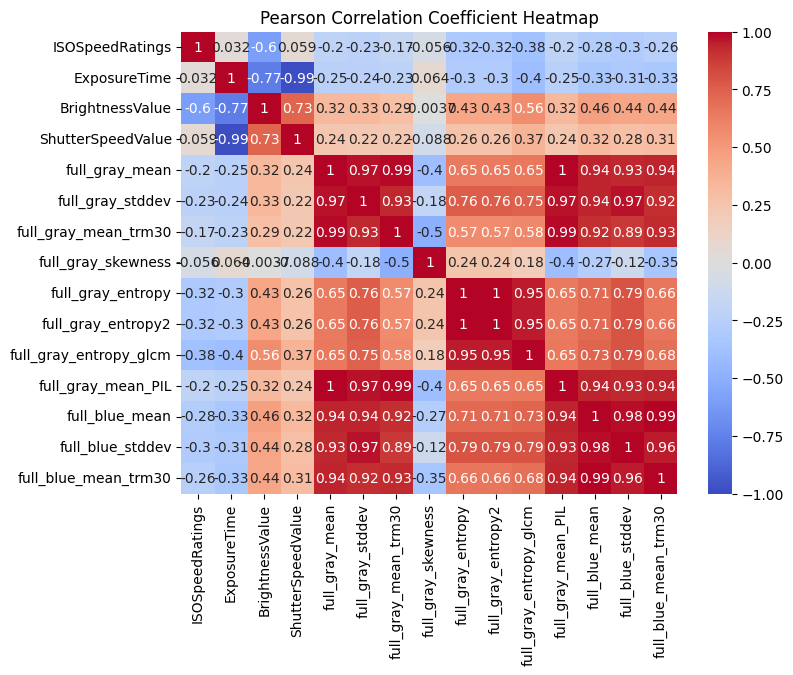

Features after dropping highly correlated columns:
       ISOSpeedRatings ExposureTime BrightnessValue  full_gray_mean  \
0                226.0     0.020003             8.7       76.378944   
1                226.0     0.020003             8.7       77.358110   
2                226.0     0.020003             8.7       77.726509   
3                226.0     0.020003             8.7       78.060442   
4                226.0     0.020003             8.7       85.116084   
...                ...          ...             ...             ...   
62011            103.0     0.009971            11.1       95.372463   
62012            103.0     0.009971            11.1       97.228363   
62013            103.0     0.009971            11.1       92.835019   
62014            103.0     0.009971            11.1       93.767244   
62015            103.0     0.009971            11.1       94.202128   

       full_gray_skewness  full_gray_entropy  
0               -0.985076           4.823226  
1 

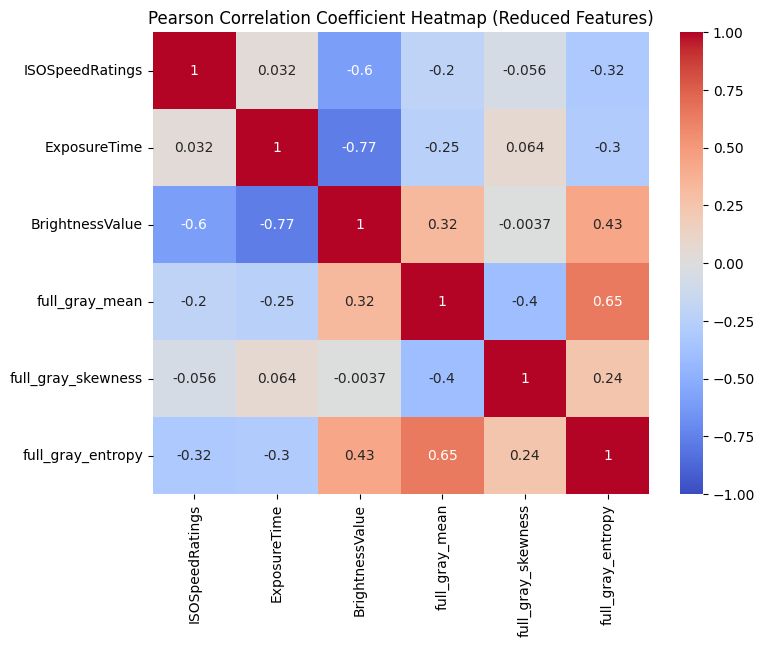

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature selection
## Pearson correltion coefficient
print(f"NUMERIC_FEATURES: {NUMERIC_FEATURES}")
df_num = df[NUMERIC_FEATURES[0:15]]

correlation_matrix = df_num.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

## Chi Squared
# Set the correlation threshold
threshold = 0.8

# Create a mask to identify columns to drop
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Drop the identified columns
df_num_dropped = df_num.drop(columns=to_drop)

# Print the resulting DataFrame
print("Features after dropping highly correlated columns:")
print(df_num_dropped)

# Plot the heatmap of the remaining features
plt.figure(figsize=(8, 6))
sns.heatmap(df_num_dropped.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap (Reduced Features)')
plt.show()

In [103]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Convert categorical target to numeric values
le = LabelEncoder()
y = le.fit_transform(df["class_target"])

# Select categorical features for chi-squared test
categorical_features = [col for col in df.columns if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]

# Chi-squared test
chi2_values, p_values = chi2(df[NUMERIC_FEATURES], y)

# Print Chi-Squared test results
chi2_results = pd.DataFrame({"Feature": categorical_features, "Chi2 Stat": chi2_values, "p-value": p_values})
print("Chi-Squared Test Results:")
print(chi2_results)

C:\Users\Fral0\AppData\Local\Temp\ipykernel_10812\2057085790.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  categorical_features = [col for col in df.columns if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]


ValueError: Input X must be non-negative.

In [ ]:
df = pd.get_dummies(df[CATEGORICAL_FEATURES])
print(list(df.columns))
print(df)

# Missing Data Analysis

# Class analysis

Number of classes: 6
Classes: ['0000 CFU:mL', '10^1 CFU:mL', '10^2 CFU:mL', '10^4 CFU:mL', '10^6 CFU:mL', '10^8 CFU:mL']
Number of samples in class "0000 CFU:mL": 11616
Number of samples in class "10^1 CFU:mL": 12672
Number of samples in class "10^2 CFU:mL": 11232
Number of samples in class "10^4 CFU:mL": 8544
Number of samples in class "10^6 CFU:mL": 13056
Number of samples in class "10^8 CFU:mL": 4896


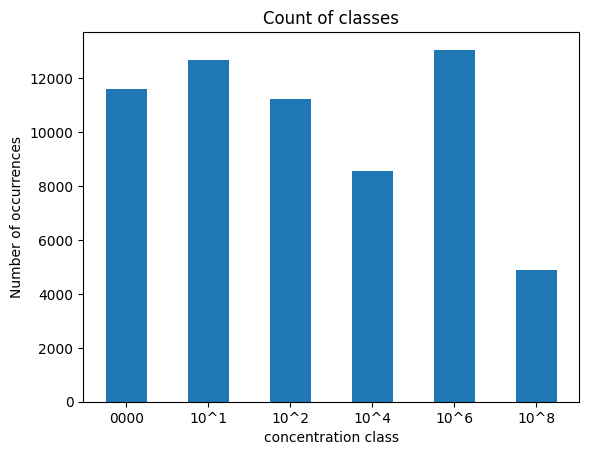

In [11]:
# Find classes
# classes = df['class_target'].unique()
classes = sorted(df['class_target'].unique())
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

# Find number of samples per class
# classes_counts = df['class_target'].value_counts()
# print(classes_counts)
classes_counts = []
for c in classes:
    class_count = len(df[df['class_target'] == c])
    classes_counts.append(class_count)
    print(f"Number of samples in class \"{c}\": {class_count}")

# # Get distribution of gold concentration
import matplotlib.pyplot as plt

# Count the occurrences of value_target in each interval
# intervals = list(range(1, len(classes) + 1))
intervals = [class_name.strip(" CFU:mL") for class_name in classes]
# Plot the histogram
plt.bar(intervals, classes_counts, width=0.5)

# Set the labels and title
plt.xlabel('concentration class')
plt.ylabel('Number of occurrences')
plt.title('Count of classes')

# Show the plot
plt.show()


# Regression analysis

Max concentration: 1.521
Min concentration: 0.184
intervals: [0.184, 0.189348, 0.194696, 0.200044, 0.205392, 0.21073999999999998, 0.216088, 0.221436, 0.22678399999999999, 0.232132, 0.23748, 0.242828, 0.248176, 0.25352399999999997, 0.258872, 0.26422, 0.269568, 0.274916, 0.28026399999999996, 0.285612, 0.29096, 0.296308, 0.301656, 0.307004, 0.31235199999999996, 0.3177, 0.323048, 0.328396, 0.333744, 0.33909199999999995, 0.34443999999999997, 0.349788, 0.355136, 0.36048399999999997, 0.365832, 0.37117999999999995, 0.376528, 0.381876, 0.387224, 0.392572, 0.39791999999999994, 0.40326799999999996, 0.408616, 0.413964, 0.41931199999999996, 0.42466, 0.43000799999999995, 0.43535599999999997, 0.440704, 0.44605199999999995, 0.45139999999999997, 0.456748, 0.46209599999999995, 0.46744399999999997, 0.472792, 0.47813999999999995, 0.483488, 0.488836, 0.49418399999999996, 0.499532, 0.50488, 0.5102279999999999, 0.515576, 0.5209239999999999, 0.526272, 0.53162, 0.5369679999999999, 0.542316, 0.5476639999999999,

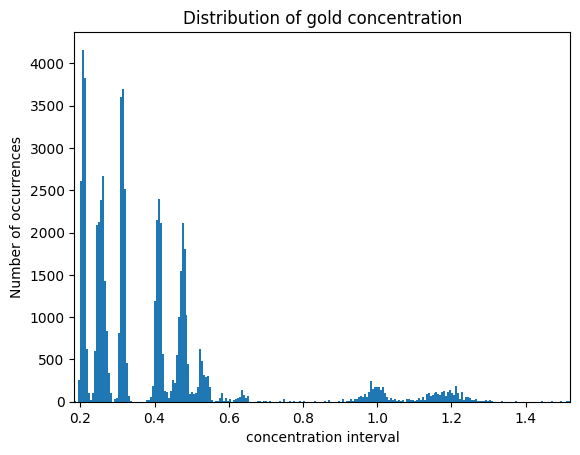

In [23]:
# Get distribution of gold concentration
import matplotlib.pyplot as plt

# Get the maximum and minimum values of value_target
max_value = df['value_target'].max()
min_value = df['value_target'].min()

print(f"Max concentration: {max_value}")
print(f"Min concentration: {min_value}")

# Calculate the step size
number_of_intervals = 250
step_size = (max_value - min_value) / number_of_intervals
intervals = [min_value + i * step_size for i in range(number_of_intervals + 1)]
print(f"intervals: {intervals}")

# Count the occurrences of value_target in each interval
value_counts, _, _ = plt.hist(df['value_target'], bins=intervals)

# Plot the histogram
plt.bar(intervals[:-1], value_counts, width=step_size, align='edge')

# Set the labels and title
plt.xlabel('concentration interval')
plt.ylabel('Number of occurrences')
plt.title('Distribution of gold concentration')

# Adjust x-axis to start from 0
plt.xlim(min(intervals), max(intervals))

# Show the plot
plt.show()


Percentage of missing values per column:
value_target: 0.0%
class_target: 0.0%
well_plate_name: 0.0%
wp_image_version: 0.0%
wp_image_prop: 0.0%
well_name: 0.0%
mock: 0.0%
FNumber: 0.0%
FocalLengthIn35mmFilm: 0.0%
ISOSpeedRatings: 0.0%
Orientation: 0.0%
ExposureTime: 0.0%
FocalLength: 0.0%
Flash: 0.0%
MeteringMode: 0.0%
MaxApertureValue: 0.0%
ExposureBiasValue: 0.0%
BrightnessValue: 0.0%
ApertureValue: 0.0%
ShutterSpeedValue: 0.0%
full_gray_mean: 0.0%
full_gray_stddev: 0.0%
full_gray_mean_trm30: 0.0%
full_gray_skewness: 0.0%
full_gray_entropy: 0.0%
full_gray_entropy2: 0.0%
full_gray_entropy_glcm: 0.0%
full_gray_mean_PIL: 0.0%
full_blue_mean: 0.0%
full_blue_stddev: 0.0%
full_blue_mean_trm30: 0.0%
full_blue_skewness: 0.0%
full_blue_entropy: 0.0%
full_blue_entropy2: 0.0%
full_blue_entropy_glcm: 0.0%
full_blue_mean_PIL: 0.0%
full_green_mean: 0.0%
full_green_stddev: 0.0%
full_green_mean_trm30: 0.0%
full_green_skewness: 0.0%
full_green_entropy: 0.0%
full_green_entropy2: 0.0%
full_green_entrop

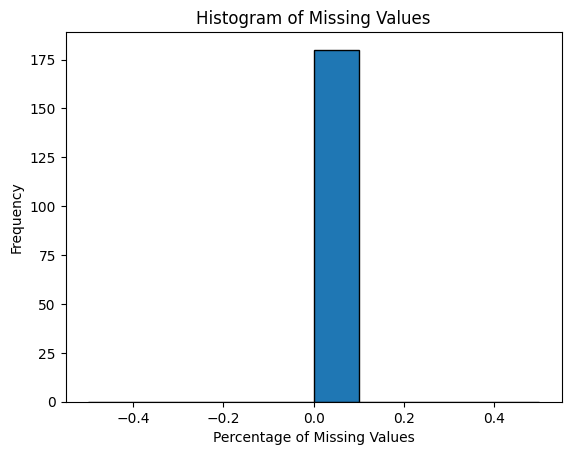

In [33]:
import numpy as np

print("Percentage of missing values per column:")
pct_missings = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    pct_missings.append(pct_missing)
    print(f'{col}: {pct_missing}%')

print(f"Mean percentage of missing values: {np.mean(pct_missings)}")

# Print the histogram of missing values using matplotlib
import matplotlib.pyplot as plt

# pct_missings = pct_missings + [0.1] * (100) + [0.05] * (100)  + [0.06] * (100)

fig, ax = plt.subplots()
ax.hist(pct_missings, bins=10, edgecolor='black')
ax.set_title('Histogram of Missing Values')
ax.set_xlabel('Percentage of Missing Values')
ax.set_ylabel('Frequency')
plt.show()

## Outlier Analysis

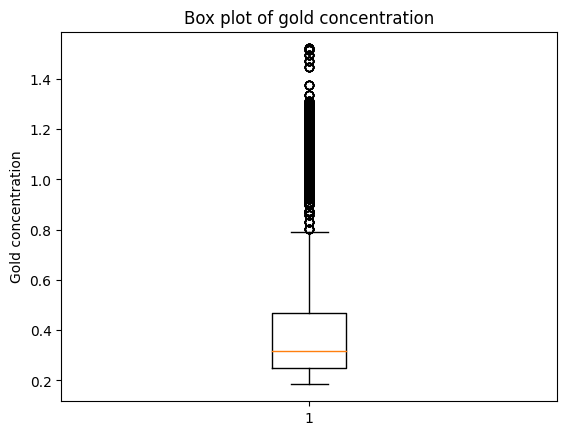

Number of outliers: 40


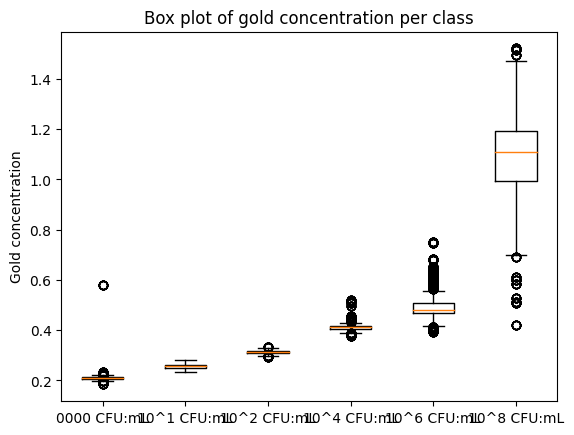

In [ ]:
# Box plot of the gold concentration
import matplotlib.pyplot as plt

plt.boxplot(df['value_target'])
plt.title('Box plot of gold concentration')
plt.ylabel('Gold concentration')
plt.show()

# Count number of outliers
# # Count number of occurrences greater than 3 standard deviations from the mean
# mean = df['value_target'].mean()
# std = df['value_target'].std()
# outliers = df[(df['value_target'] > mean + 3 * std) | (df['value_target'] < mean - 3 * std)]
# print(f"Number of outliers: {len(outliers)}")

# Count number of occurrences greater than max_value or less than min_value
max_value = 1.4
min_value = 0.7

# outliers = df[(df['value_target'] > max_value) | (df['value_target'] < min_value)]
outliers = df[(df['value_target'] > max_value)]
print(f"Number of outliers: {len(outliers)}")

# Box plot of the gold concentration per class
import matplotlib.pyplot as plt

# Create a list of gold concentrations per class
class_values = []
for c in classes:
    class_values.append(df[df['class_target'] == c]['value_target'])

# Create a box plot
plt.boxplot(class_values)
plt.title('Box plot of gold concentration per class')
plt.ylabel('Gold concentration')
plt.xticks(range(1, len(classes) + 1), classes)
plt.show()

# Classification

Algorithms we can use:
- K-means
- K-medoids
- Hierarchical clustering

## K-means and K-medoids

### Data pre processing

## Hierarchical clustering

### Data pre processing

## Deep learning

### Data pre processing